In [2]:
# Characteristics of Network

# Network Characteristics:
#|-------------------------|-------------------------||-------------------------|
#|         Layer_1         |         Layer_2         ||    Chaos Percentage     |
#|   w       b       σ()   |   w       b       σ()   ||                         |
#|   1      He      ReLU   |   He     He        1    ||          ~13.77 %       |
#|   He     He      ReLU   |   He     He      ReLU   ||           ~4.51 %       |
#|   He      U      ReLU   |   He     U       ReLU   ||           ~7.49 %       |
#|N(0,1/k) TR(-1,1) ReLU   |N(0,1/k) TR(-1,1) ReLU   ||           ~4.4 %        |
#|Glorot   Glorot   ReLU   |Glorot   Glorot   ReLU   ||           ~2.28 %       |
#|-------------------------|-------------------------||-------------------------|

In [3]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline
from scipy.stats import truncnorm
import scipy.stats as stats
import math

In [4]:
import scipy.stats
lower = 0
upper = 1
mu = 0.5
sigma = 0.1
N = 1

samples = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

n_inputs = 2
n_neurons = 3
weights = np.zeros((n_inputs,n_neurons))

for i in range(len(weights)):
  for j in range(len(weights[0])):
    weights[i][j] = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)[0]

print(weights)
    

[[0.52141357 0.45262783 0.45187444]
 [0.63644439 0.69526714 0.24157978]]


In [5]:
# Dense Layer 1
class Layer_Dense_In:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,w,b):
    '''
    Weight Initialization
    '''
    if w == 'he':
      # He Initialization
      self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(2/n_inputs)
    elif w == '1':
      # 1 Initialization
      self.weights = np.ones((n_inputs, n_neurons))
    elif w == 'normal':
      # Normal Initialization    
      self.weights = 1 * np.random.randn(n_inputs, n_neurons)
    elif w == 'normal_k':
      # Normal Initialization    
      self.weights = (1/n_neurons)* np.random.randn(n_inputs, n_neurons)
    elif w == 'uniform':
      # Uniform Initialization
      self.weights = np.random.uniform(size=(n_inputs,n_neurons))
    elif w == 'glorot':
      # Glorot Initialization
      self.weights = np.sqrt(2.0/(n_inputs +n_neurons)) * np.random.randn(n_inputs, n_neurons)
    '''
    Bias Initialization
    '''
    if b == 'he':
      # He Initialization
      self.biases = np.random.randn(1,n_neurons)* np.sqrt(2/n_inputs)
    elif b == '1':
      # 1 Initialization
      self.biases = np.zeros((1, n_neurons))
    elif b == 'normal':
      # Normal Initialization    
      self.biases = 1 * np.random.randn(1,n_neurons)
    elif b == 'normal_k':
      # Normal Initialization    
      self.biases = (1/n_neurons)* np.random.randn(n_inputs, n_neurons)
    elif b == 'uniform':
      # Uniform Distribution
      self.biases = np.random.uniform(size=(1,n_neurons))
    elif b == 'glorot':
      # Glorot Initialization
      self.biases = np.sqrt(2.0/(n_inputs +n_neurons)) * np.random.randn(1, n_neurons)

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# Dense Layer 2
class Layer_Dense_Mid:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,w,b):
    '''
    Weight Initialization
    '''
    if w == 'he':
      # He Initialization
      self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(2/n_inputs)
    elif w == '1':
      # 1 Initialization
      self.weights = np.ones((n_inputs, n_neurons))
    elif w == 'normal':
      # Normal Initialization    
      self.weights = 1 * np.random.randn(n_inputs, n_neurons)
    elif w == 'normal_k':
      # Normal Initialization    
      self.weights = (1/n_neurons)* np.random.randn(n_inputs, n_neurons)
    elif w == 'uniform':
      # Uniform Initialization
      self.weights = np.random.uniform(size=(n_inputs,n_neurons))
    elif w == 'glorot':
      # Glorot Initialization
      self.weights = np.sqrt(2.0/(n_inputs +n_neurons)) * np.random.randn(n_inputs, n_neurons)
    '''
    Bias Initialization
    '''
    if b == 'he':
      # He Initialization
      self.biases = np.random.randn(1,n_neurons)* np.sqrt(2/n_inputs)
    elif b == '1':
      # 1 Initialization
      self.biases = np.zeros((1, n_neurons))
    elif b == 'normal':
      # Normal Initialization    
      self.biases = 1 * np.random.randn(1,n_neurons)
    elif b == 'normal_k':
      # Normal Initialization    
      self.biases = (1/n_neurons)* np.random.randn(1, n_neurons)
    elif b == 'uniform':
      # Uniform Distribution
      self.biases = np.random.uniform(size=(1,n_neurons))
    elif b == 'glorot':
      # Glorot Initialization
      self.biases = np.sqrt(2.0/(n_inputs +n_neurons)) * np.random.randn(1, n_neurons)

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

# Dense Layer 3
class Layer_Dense_Out:
  
    # Layer initialization
  def __init__(self,n_inputs,n_neurons,w,b,clip):

    if clip == 'clip':
      self.clipping_flag = True
    else:
      self.clipping_flag = False
    '''
    Weight Initialization
    '''
    if w == 'he':
      # He Initialization
      self.weights = np.random.randn(n_inputs, n_neurons) * np.sqrt(2/n_inputs)
    elif w == '1':
      # 1 Initialization
      self.weights = np.ones((n_inputs, n_neurons))
    elif w == 'normal':
      # Normal Initialization    
      self.weights = 1 * np.random.randn(n_inputs, n_neurons)
    elif w == 'normal_k':
      # Normal Initialization    
      self.weights = (1/n_neurons)* np.random.randn(n_inputs, n_neurons)
    elif w == 'uniform':
      # Uniform Initialization
      self.weights = np.random.uniform(size=(n_inputs,n_neurons))
    elif w == 'glorot':
      # Glorot Initialization
      self.weights = np.sqrt(2.0/(n_inputs +n_neurons)) * np.random.randn(n_inputs, n_neurons)
    '''
    Bias Initialization
    '''
    if b == 'he':
      # He Initialization
      self.biases = np.random.randn(1,n_neurons)* np.sqrt(2/n_inputs)
    elif b == '1':
      # 1 Initialization
      self.biases = np.zeros((1, n_neurons))
    elif b == 'normal':
      # Normal Initialization    
      self.biases = 1 * np.random.randn(1,n_neurons)
    elif b == 'normal_k':
      # Normal Initialization    
      self.biases = (1/n_neurons)* np.random.randn(1, n_neurons)
    elif b == 'uniform':
      # Uniform Distribution
      self.biases = np.random.uniform(size=(1,n_neurons))
    elif b == 'glorot':
      # Glorot Initialization
      self.biases = np.sqrt(2.0/(n_inputs +n_neurons)) * np.random.randn(1, n_neurons)

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

    # Output clipping [0,1]
    if self.clipping_flag == True:
      if self.output > 1:
        self.output = 1
      if self.output < 0:
        self.output = 0

In [6]:
# ReLU activation
class Activation_ReLU:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0,inputs)

# Tanh activation
class Activation_Tanh:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.tanh(inputs)

# Data Flow at every composition
def RNN_Pass(input):

  layer_in.forward(input)
  layer_act1.forward(layer_in.output)
  layer_mid.forward(layer_act1.output)
  layer_act2.forward(layer_mid.output)
  layer_out.forward(layer_act2.output)
  layer_act3.forward(layer_out.output)

  return layer_act3.output

Loading... 0 / 10000
Loading... 1000 / 10000
Loading... 2000 / 10000
Loading... 3000 / 10000
Loading... 4000 / 10000
Loading... 5000 / 10000
Loading... 6000 / 10000
Loading... 7000 / 10000
Loading... 8000 / 10000
Loading... 9000 / 10000
Chaos percentage =  1.06 %


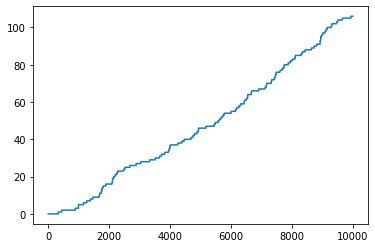

In [7]:
# Main Loop - Mapping of [0,1] -> [0,1]

# Initialization parameters:
# * Network Depth
# * Image Resolution

chaos_class = []

experiment_length = 10000

for experiment in range(experiment_length):
  
  if experiment % 1000 == 0:
    print("Loading...", experiment,"/",experiment_length)

  # Randomly initialize a new RNN
  width = 2
  ACTIVATION = 'relu'
  CLIPPING = 'noclip'

  layer_in = Layer_Dense_In(1,width,'glorot','glorot')
  layer_mid = Layer_Dense_Mid(width,width,'glorot','glorot')
  layer_out = Layer_Dense_Out(width,1,'glorot','glorot',CLIPPING)

  if ACTIVATION == 'relu':
    layer_act1 = Activation_ReLU()
    layer_act2 = Activation_ReLU()
    layer_act3 = Activation_ReLU()
  elif ACTIVATION == 'tanh':
    layer_act1 = Activation_Tanh()
    layer_act2 = Activation_Tanh()
    layer_act3 = Activation_Tanh()

  #layer_mid = Layer_Dense_Mid(width,width,'he','he')
  #layer_act2 = Activation_Tanh()

  #layer_act3 = Activation_Tanh()

  # Set the granularity of the plot allocate memory
  X_granularity = 163
  window = 1
  zero_line = np.linspace(0,0,num=X_granularity, endpoint=True)
  test_X = np.linspace(-window,window,num=X_granularity, endpoint=True)
  test_X_plot_F0 = np.linspace(-window,window,num=X_granularity, endpoint=True)
  test_X_plot_F3 = np.linspace(-window,window,num=X_granularity, endpoint=True)

  # Function calculation, f and f^3
  for iter in range(len(test_X)):
    test_X_plot_F0[iter] = RNN_Pass(test_X_plot_F0[iter])
    test_X_plot_F3[iter] = RNN_Pass(RNN_Pass(RNN_Pass(test_X_plot_F0[iter])))

  '''
  plt.plot(test_X,test_X)
  plt.plot(test_X,test_X_plot_F0)
  plt.plot(test_X,test_X_plot_F3)
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  break
  '''

  f1_points = 0
  f3_points = 0

  for check in range(1,len(test_X)-1):
    if (test_X[check-1]-test_X_plot_F0[check-1])*(test_X[check]-test_X_plot_F0[check]) < 0:
      f1_points +=1
    if (test_X[check-1]-test_X_plot_F3[check-1])*(test_X[check]-test_X_plot_F3[check]) < 0:
      f3_points +=1
    if (test_X[check]-test_X_plot_F3[check]) == 0:
      if (test_X[check-1]-test_X_plot_F3[check-1])*(test_X[check+1]-test_X_plot_F3[check+1])<0:
        f3_points +=1
    if (test_X[check]-test_X_plot_F0[check]) == 0:
      if (test_X[check-1]-test_X_plot_F0[check-1])*(test_X[check+1]-test_X_plot_F0[check+1])<0:
        f1_points +=1

  if f3_points - f1_points > 0:
    if len(chaos_class)==0:
      chaos_class.append(1)
    else:
      chaos_class.append(chaos_class[-1]+1)
  else:
    if len(chaos_class)==0:
      chaos_class.append(0)
    else:
      chaos_class.append(chaos_class[-1])

plt.plot(chaos_class)
chaos_class_percentage = []

for i in range(0,len(chaos_class)):
  chaos_class_percentage.append((chaos_class[i])/(i+1))

print("Chaos percentage = ", 100*chaos_class_percentage[-1],"%")